# Слкуни Герман РТ5-61Б. Лаб 4
## Загрузка датасета

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Загрузка данных
data = load_wine(as_frame=True)
df = data.frame

# Вывод информации о данных
print("Размер данных:", df.shape)
print("Пример данных:")
print(df.head())

Размер данных: (178, 14)
Пример данных:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilu

## Разделение и нормирование датасета 

In [33]:
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Уменьшаем выборку до 10% от исходной с сохранением пропорций классов
X, _, y, _ = train_test_split(
    X, y,
    train_size=0.2,в ц
    stratify=y,
    random_state=42
)

# Разбиение выборки (80% train / 20% test) с сохранением пропорций классов
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test:",  X_test.shape)
print("y_train:", y_train.shape)
print("y_test:",  y_test.shape)



X_train: (28, 13)
X_test: (7, 13)
y_train: (28,)
y_test: (7,)


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Разделим колонки на непрерывные и бинарные
binary_cols = [c for c in X_train.columns if X_train[c].nunique()==2]
cont_cols   = [c for c in X_train.columns if c not in binary_cols]

# Настроим ColumnTransformer
ct = ColumnTransformer([
    ('scale', StandardScaler(), cont_cols)
], remainder='passthrough')  # passthrough отдаст бинарные как есть

# Применим трансформацию
X_train_scaled = pd.DataFrame(
    ct.fit_transform(X_train),
    columns=cont_cols + binary_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    ct.transform(X_test),
    columns=cont_cols + binary_cols,
    index=X_test.index
)

# Посмотрим
X_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
53,0.764115,-0.363467,0.981943,-0.760052,0.925359,0.982911,0.688560,0.272166,-0.041460,0.325443,0.619548,0.494431,1.684525
5,1.239319,-0.498135,0.180458,-1.317004,0.736694,1.380067,1.301912,-0.181444,0.453626,0.481063,0.312515,0.363208,1.890625
125,-1.114598,-0.113369,-0.795262,0.383166,-0.961295,0.394530,0.545445,0.090722,-0.604835,-0.898766,-0.416687,1.068534,-1.055232
171,-0.341010,0.107872,-0.411943,-0.056533,-0.898407,-1.385321,-1.642176,1.088662,-1.816943,1.570400,-1.529680,-1.637950,-0.802416
86,-1.015137,-0.642422,-0.307402,0.910806,-0.646853,-0.811650,-0.435918,0.635053,-0.246324,-1.005970,1.387129,-0.604565,-0.733716


In [35]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Инициализация модели
logreg = LogisticRegression(
    solver='lbfgs',
    max_iter=3000,
    random_state=42
)

# Обучение на тренировочной выборке
start = time.time()
logreg.fit(X_train, y_train)
train_time = time.time() - start

# Предсказание на тестовой выборке
y_pred = logreg.predict(X_test)

# Оценка качества
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Training time: {train_time:.2f} sec")

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.89      0.83      0.82         7
weighted avg       0.90      0.86      0.85         7

Training time: 0.34 sec


/home/mrcreepton/Документы/нирс/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Инициализация SVM (RBF‑kernel)
svm_clf = SVC(kernel='rbf', C=1.0, random_state=42, decision_function_shape='ovo')

# Обучение на тренировочной выборке
start = time.time()
svm_clf.fit(X_train, y_train)
train_time = time.time() - start

# Предсказание на тестовой выборке
y_pred_svm = svm_clf.predict(X_test)

# Оценка качества
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, zero_division=0 ))
print(f"Training time: {train_time:.2f} sec")

SVM Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.47      0.67      0.55         7
weighted avg       0.51      0.71      0.60         7

Training time: 0.00 sec


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Инициализация Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# Замер времени обучения
start = time.time()
dt_clf.fit(X_train, y_train)
train_time = time.time() - start

# Предсказание на тестовой выборке
y_pred_dt = dt_clf.predict(X_test)

# Вывод метрик и времени
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))
print(f"Training time: {train_time:.2f} sec")

Decision Tree Accuracy: 0.8571
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         2

    accuracy                           0.86         7
   macro avg       0.89      0.83      0.82         7
weighted avg       0.90      0.86      0.85         7

Training time: 0.00 sec


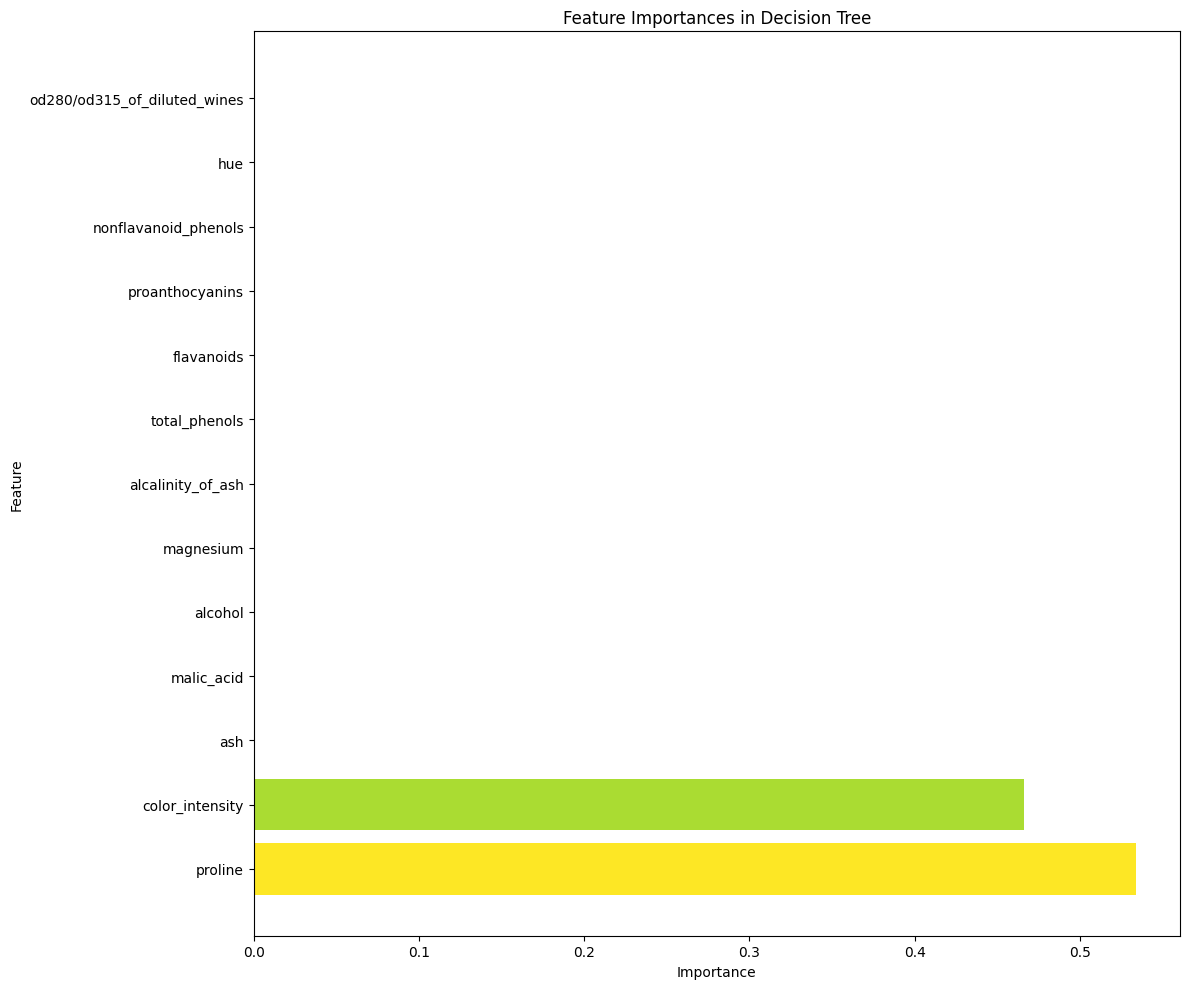

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# собираем важности из обученного дерева dt_clf
feat_imp = pd.Series(
    dt_clf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(feat_imp.index, feat_imp.values, color=plt.cm.viridis(feat_imp.values / feat_imp.values.max()))
plt.title("Feature Importances in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [39]:
from sklearn.tree import export_text

rules = export_text(dt_clf, feature_names=list(X_train.columns))
print(rules)

|--- proline <= 805.00
|   |--- color_intensity <= 4.30
|   |   |--- class: 1
|   |--- color_intensity >  4.30
|   |   |--- class: 2
|--- proline >  805.00
|   |--- class: 0



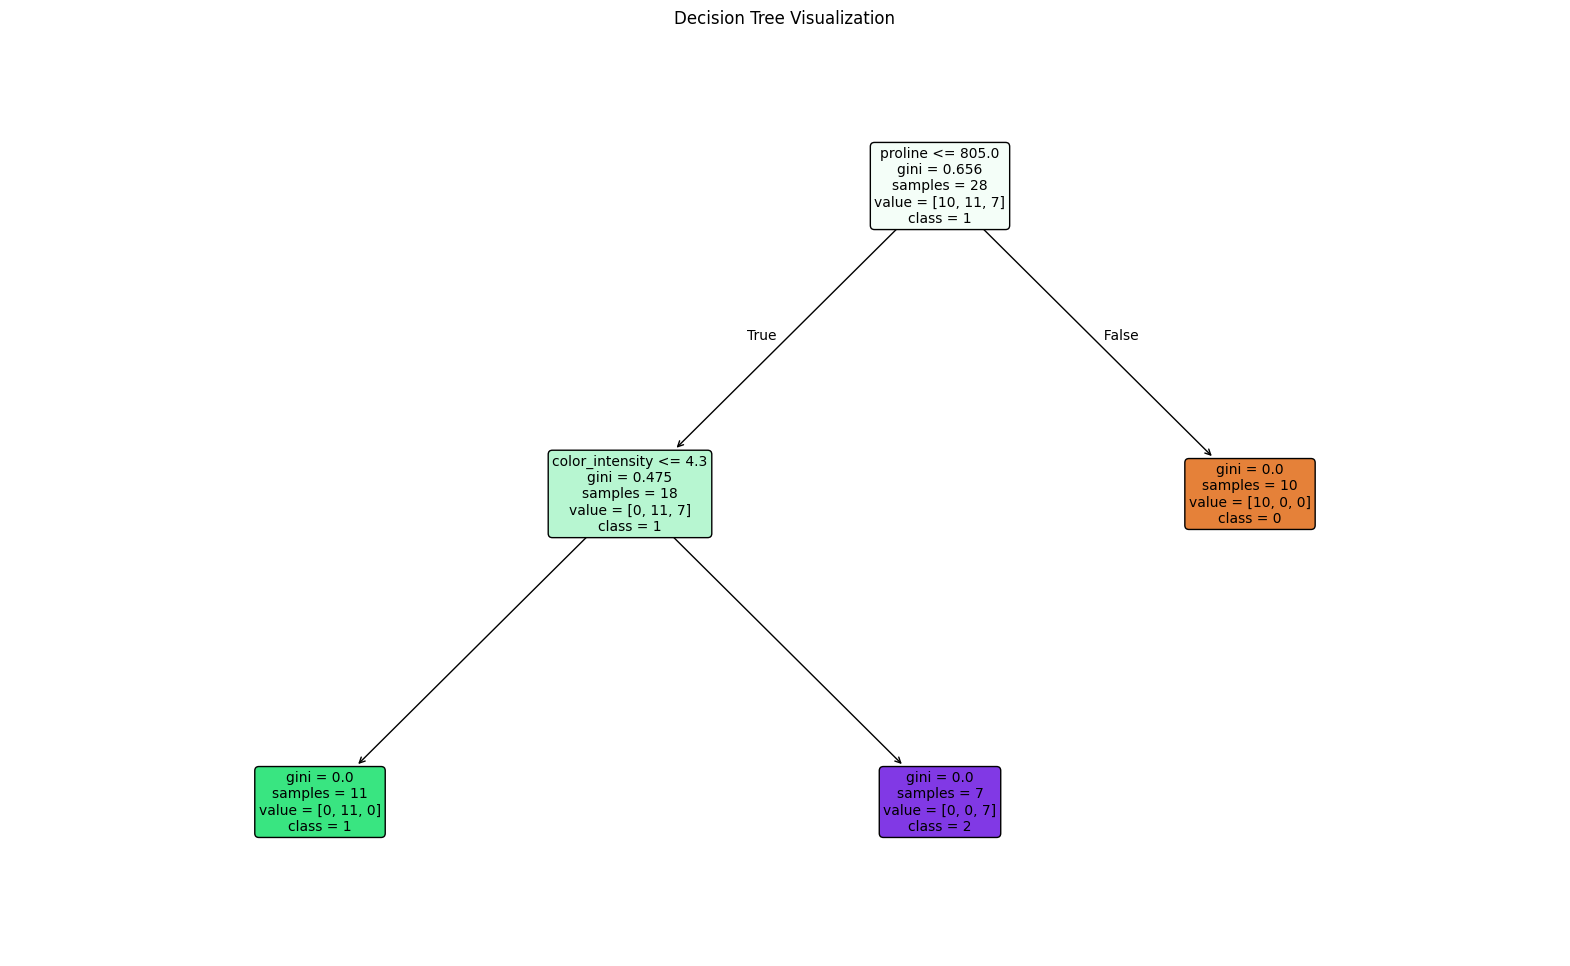

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plot_tree(
    dt_clf,
    feature_names=list(X_train.columns),
    class_names=[str(c) for c in dt_clf.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()
